In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [114]:
data=pd.read_csv("household_data.csv",parse_dates='timestamp',index_col='timestamp')
data

TypeError: Only booleans, lists, and dictionaries are accepted for the 'parse_dates' parameter

In [112]:
data = data.drop(columns = ['mains','solar'])

In [64]:
# data = data.drop(columns = ['TYPE','UNITS','COST','NOTES'])

In [113]:
data

,timestamp,Main I,AC,Living Rm,Lights living / bath / baby,Bath plgs,Holiday,(unnamed II - A),Fridge,Kitchn / dining Lts,Furnace,Microwave,Guest,test,Guest bath,Mini Fridge/Dshwshr,Other,use
0,2016-07-31 09:00:00-05:00,909.066398,1452.204957,70.742116,90.943929,0.0,0.000000,1135.464789,101.452290,60.543820,0.000000,6.161513,0.000000,943.106552,0.000000,46.881162,0.000000,2044.531187
1,2016-07-31 10:00:00-05:00,928.834122,1153.470483,121.270728,89.073750,0.0,5.154145,1068.735597,133.702863,106.016417,149.113886,37.952398,125.527769,943.106552,26.302717,28.151907,0.000000,1997.569719
2,2016-07-31 11:00:00-05:00,780.028611,1090.394879,101.716817,0.000000,0.0,5.155099,987.202778,38.674079,162.201625,145.187357,6.157197,115.612561,943.106552,50.466295,27.356844,0.000000,1767.231389
3,2016-07-31 12:00:00-05:00,577.240556,655.752587,89.095648,15.071262,0.0,5.163330,742.453333,57.763612,161.788384,87.997235,38.938323,130.161645,943.106552,26.339928,31.385268,0.000000,1319.693889
4,2016-07-31 13:00:00-05:00,1180.745556,1626.139890,84.774443,0.000000,0.0,0.000000,1307.005833,63.439516,160.824700,190.763621,6.260919,264.954291,943.106552,29.593455,31.506551,0.000000,2487.751389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2016-08-05 10:00:00-05:00,551.518175,437.776361,95.171046,0.000000,0.0,5.871849,866.314726,123.136775,284.752812,78.759463,18.555323,208.641486,0.000000,83.188461,27.862243,54.117082,1417.832901
122,2016-08-05 11:00:00-05:00,1015.494462,1519.170920,97.483359,0.000000,0.0,5.419981,1408.340264,52.678907,280.978985,190.003626,24.843447,115.054472,0.000000,27.582622,26.907925,83.710481,2423.834726
123,2016-08-05 12:00:00-05:00,1244.441705,1938.107544,97.141069,0.000000,0.0,5.167972,1728.615258,87.987209,276.594146,224.485636,44.531646,131.753148,0.000000,40.814037,32.239385,94.235169,2973.056964
124,2016-08-05 13:00:00-05:00,1420.091312,2108.369726,95.256924,0.000000,0.0,5.002844,1753.196297,25.781737,284.754681,234.107070,29.231001,220.195155,0.000000,39.346018,31.398208,99.844245,3173.287608


In [80]:
# from datetime import timedelta
# x = '0:14'
# td = timedelta(x,'%m:%s')
# td
from datetime import datetime
def convert_time(x):
    pt = datetime.strptime(x,'%M:%S')
    total_seconds = pt.second + pt.minute*60 + pt.hour*3600
    return total_seconds


In [81]:
data['START TIME'] = data['START TIME'].apply(conver_time)

In [82]:
data['END TIME'] = data['END TIME'].apply(conver_time)

In [83]:
data.head(2)

,START TIME,END TIME,USAGE
DATE,,,
2016-10-22,0,14,0.01
2016-10-22,15,29,0.01


In [84]:
data.tail(2)

,START TIME,END TIME,USAGE
DATE,,,
2018-10-24,1410,1424,0.03
2018-10-24,1425,1439,0.03


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70368 entries, 2016-10-22 to 2018-10-24
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START TIME  70368 non-null  int64  
 1   END TIME    70368 non-null  int64  
 2   USAGE       70368 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.1 MB


In [86]:
data.shape

(70368, 3)

In [87]:
data.describe()

,START TIME,END TIME,USAGE
count,70368.000000,70368.000000,70368.000000
mean,712.493179,726.493179,0.121941
std,415.682440,415.682440,0.210507
min,0.000000,14.000000,0.000000
25%,356.250000,370.250000,0.030000
50%,712.500000,726.500000,0.050000
75%,1068.750000,1082.750000,0.120000
max,1425.000000,1439.000000,2.360000


In [88]:
data.isna().sum()

START TIME    0
END TIME      0
USAGE         0
dtype: int64

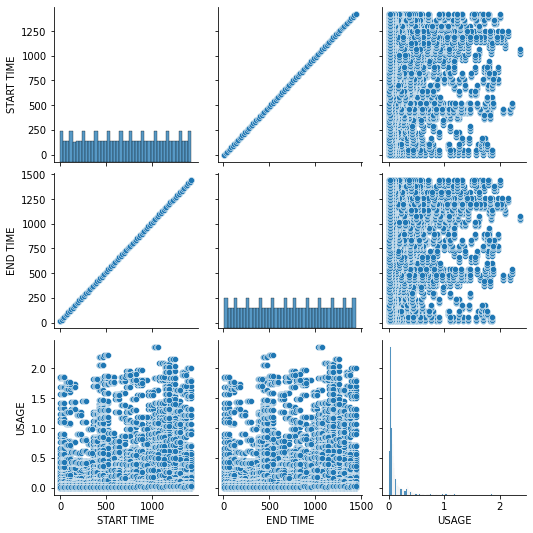

In [89]:
sns.pairplot(data)

In [90]:
month = data.resample("M").mean()

In [91]:
month.head()


,START TIME,END TIME,USAGE
DATE,,,
2016-10-31,712.500000,726.500000,0.089167
2016-11-30,711.626214,725.626214,0.140208
2016-12-31,712.500000,726.500000,0.209852
2017-01-31,712.500000,726.500000,0.249462
2017-02-28,712.500000,726.500000,0.170432


array([<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>], dtype=object)

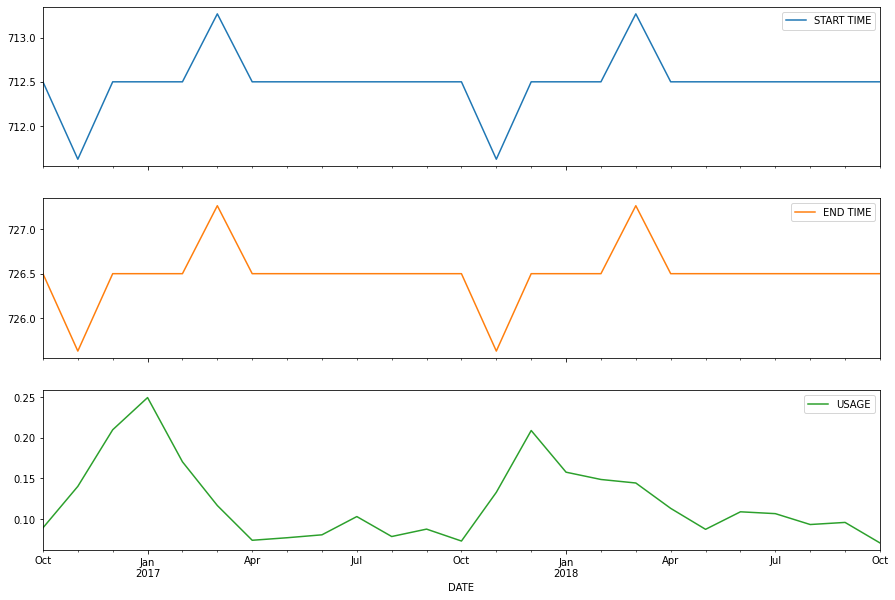

In [92]:

month.plot(subplots =  True, figsize = (15,10))

In [93]:
data.columns

Index(['START TIME', 'END TIME', 'USAGE'], dtype='object')

In [97]:
plt.figure(figsize=(10,7))
plt.scatter(data=data,x='STAR TIME',marker="o")
plt.title('Electricity States vs Usage')

TypeError: scatter() missing 1 required positional argument: 'y'

<Figure size 720x504 with 0 Axes>

C:\Users\Win\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Win\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


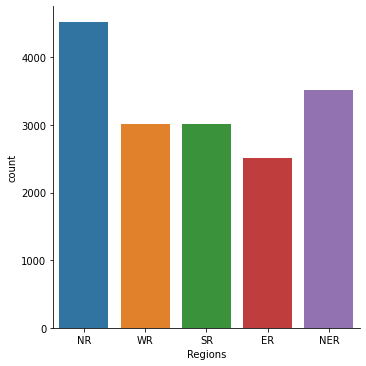

In [14]:
sns.factorplot('Regions',data=data,kind='count')

C:\Users\Win\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Win\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


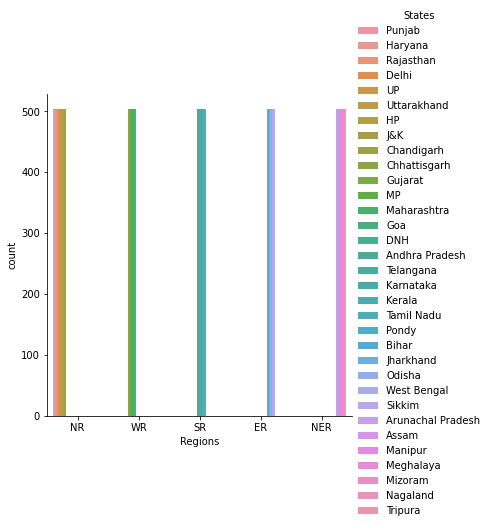

In [15]:
sns.factorplot('Regions',data=data,kind='count',hue='States')

C:\Users\Win\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


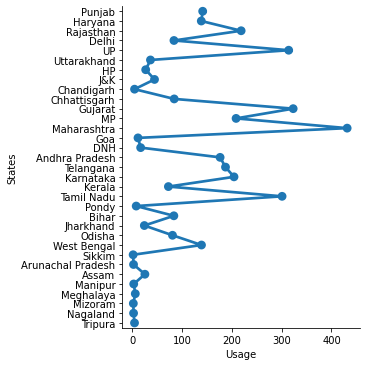

In [16]:
sns.factorplot(data=data,y="States",x="Usage")

C:\Users\Win\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


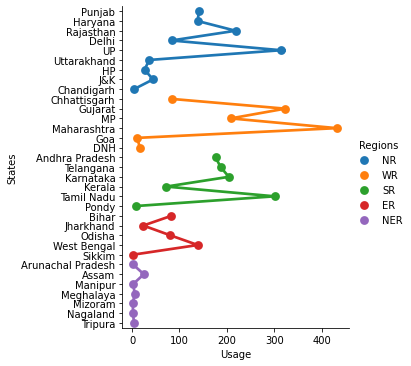

In [17]:
sns.factorplot(data=data,y="States",x="Usage",hue="Regions")

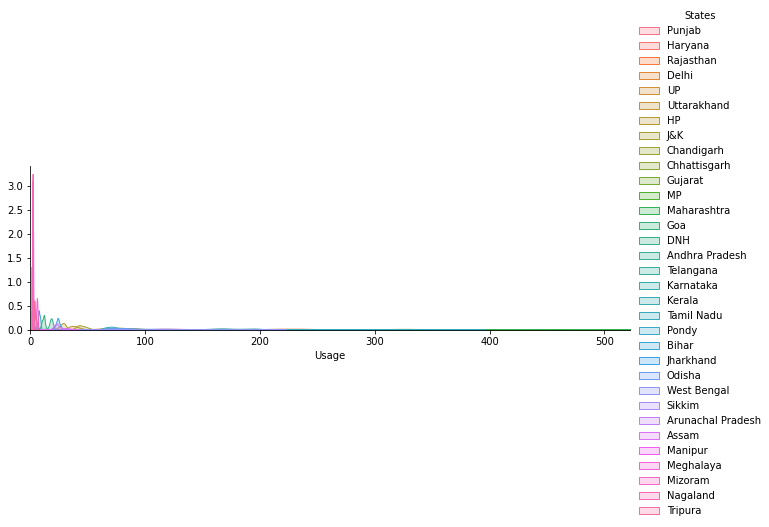

In [18]:

as_fig = sns.FacetGrid(data,hue='States',aspect=3)

as_fig.map(sns.kdeplot,'Usage',shade=True)

oldest = data['Usage'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

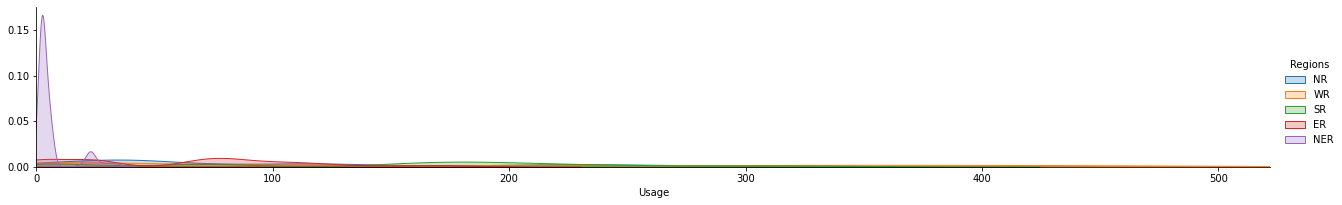

In [19]:
as_fig = sns.FacetGrid(data,hue='Regions',aspect=6)

as_fig.map(sns.kdeplot,'Usage',shade=True)

oldest = data['Usage'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

<AxesSubplot:>

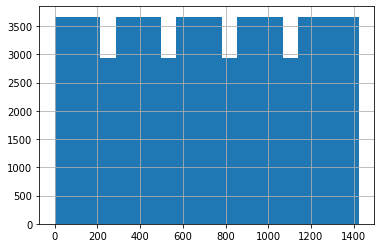

In [98]:
data['START TIME'].hist(bins=20)

In [99]:
data.corr()

,START TIME,END TIME,USAGE
START TIME,1.000000,1.000000,0.115413
END TIME,1.000000,1.000000,0.115413
USAGE,0.115413,0.115413,1.000000


<AxesSubplot:xlabel='USAGE', ylabel='START TIME'>

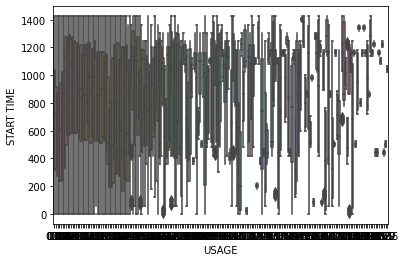

In [100]:
sns.boxplot(y = "START TIME", x = "USAGE", data = data)

<AxesSubplot:xlabel='Usage', ylabel='States'>

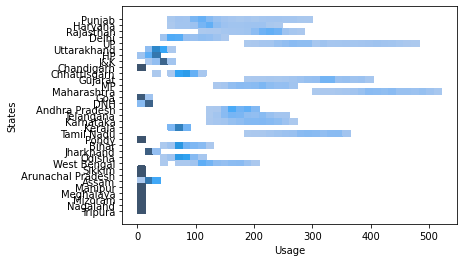

In [23]:
sns.histplot(y = "States",x="Usage",data = data)

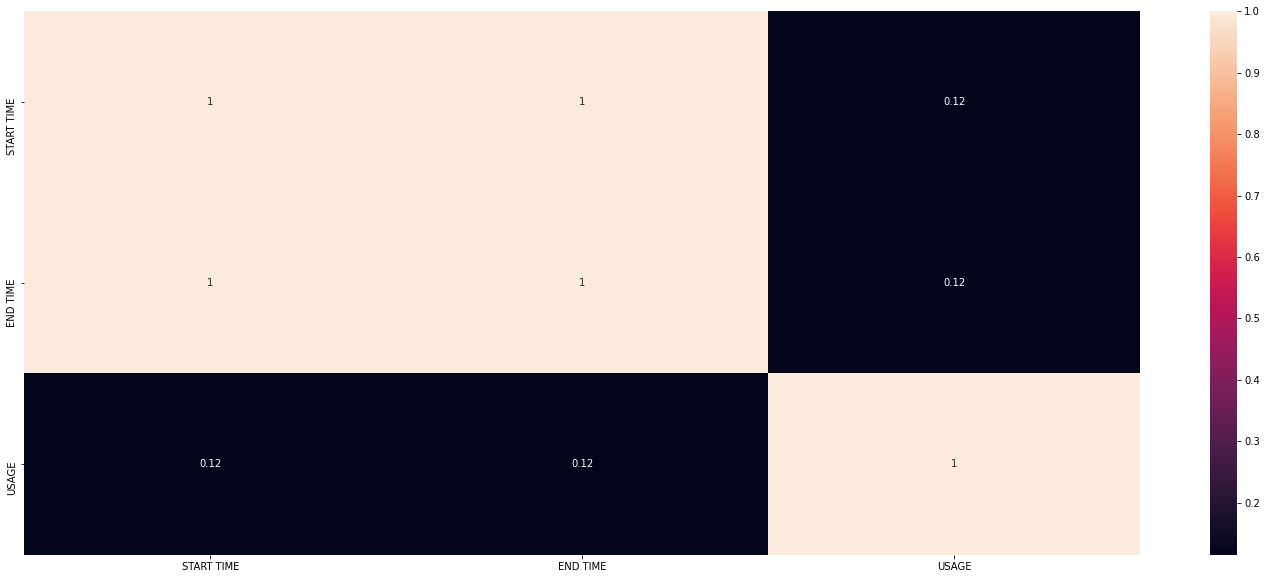

In [101]:
plt.figure(figsize = (25,10))
sns.heatmap(data.corr(), annot = True)
plt.show()

# Model Building

Check Stationality of Dataset

In [115]:
from sklearn.preprocessing import LabelEncoder

In [116]:
le = LabelEncoder()
data['Regions'] = le.fit_transform(data['Regions'])
data.head(2)

KeyError: 'Regions'

In [33]:
df = data.drop('States',axis = 1) 

In [103]:
data

,START TIME,END TIME,USAGE
DATE,,,
2016-10-22,0,14,0.01
2016-10-22,15,29,0.01
2016-10-22,30,44,0.01
2016-10-22,45,59,0.01
2016-10-22,60,74,0.01
...,...,...,...
2018-10-24,1365,1379,0.02
2018-10-24,1380,1394,0.03
2018-10-24,1395,1409,0.03


In [135]:
from statsmodels.tsa.stattools import adfuller
resu = adfuller(data.use.diff().diff().dropna())
resu[1]

1.1049618954565042e-14

In [107]:
data['USAGE'] = data['USAGE'] + 1

Since P-value is greater than the significance level, let’s difference the series and see how the autocorrelation plot looks like

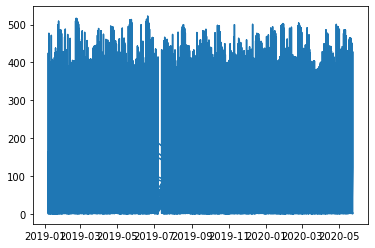

In [45]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.plot(df.Usage)

In [46]:
result = adfuller(df.Usage.diff().dropna())
result[1]

0.0

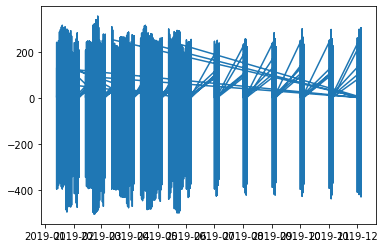

In [55]:
usage = df.Usage.diff().dropna()

plt.plot(usage.head(5000))